# Widget example using Iris dataset and 3D view

### Let's use a sample dataset created by sklearn: IRIS

I'll do some transformation to include text information.

In [1]:

import sklearn
import pandas as pd
import numpy as np
from sklearn import datasets

iris = datasets.load_iris()


In [2]:

datairis = pd.DataFrame(iris.data, columns=iris.feature_names)
data_classes = iris.target

text_column = []
for i in data_classes:
    if i == 0: text_column.append("Setosa")
    elif i == 1: text_column.append("Versicolor")
    else: text_column.append("Virginica")

datairis['iris_type'] = text_column
    
datairis.head(5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),iris_type
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa


## Get a summary of the Data

Even if you have text information in your columns!!


In [3]:

def get_summary(dataframe):
    '''
    Function to create a sunnary of a dataframe.
    '''
    basic_description = dataframe.describe()
    dataframe_summary = basic_description.T[['count','mean','std','min','max','50%']]
    dataframe_summary['unique'] = [len(dataframe[i].unique()) for i in basic_description]
    dataframe_summary['missings'] = [dataframe.isnull().sum()[i] for i in basic_description]
    dataframe_summary['type'] = [dataframe.dtypes[i] for i in basic_description]
    
    for i in dataframe.columns:
        if i not in dataframe_summary.index:
            dataframe_summary.loc[i] = [dataframe[i].count(), dataframe[i].describe().top,
                                         0,0,0,0,len(dataframe[i].unique()), 0,'text']
    return dataframe_summary



summaryIris = get_summary( datairis ) 
summaryIris 


,count,mean,std,min,max,50%,unique,missings,type
sepal length (cm),150.0,5.84333,0.828066,4.3,7.9,5.80,35,0,float64
sepal width (cm),150.0,3.054,0.433594,2.0,4.4,3.00,23,0,float64
petal length (cm),150.0,3.75867,1.764420,1.0,6.9,4.35,43,0,float64
petal width (cm),150.0,1.19867,0.763161,0.1,2.5,1.30,22,0,float64
iris_type,150.0,Setosa,0.000000,0.0,0.0,0.00,3,0,text


## Create a widget to filter data


In [4]:

def run_simple_widget(dataframe_input, minimum_rows = 7):
    '''
    Function to see a dataframe with options to filter information.
    '''
    from IPython.display import display
    import ipywidgets as ipw

    data_to_display = dataframe_input.copy()
    
    for i in data_to_display: data_to_display[i] =  data_to_display[i].astype(str)  #This might be slow for a large dataset
    data_to_display.replace(np.nan, '', regex=True, inplace=True)
    parents_list = sorted(data_to_display.columns.tolist())
    children_dictionary = dict(zip( 
                                   sorted(data_to_display.columns.tolist()), 
                   [data_to_display[i].apply(lambda x: str(x)).unique() for i in sorted(data_to_display.columns.tolist())]  ))

    def view_data_head(FieldToFilter = '',Values = '',Rows=minimum_rows):
        if children_selector.value is None: return data_to_display.head(Rows)
        if children_selector.value=='': return data_to_display.head(Rows)
        if children_selector.value=='All': return data_to_display.head(Rows)
        return data_to_display[ data_to_display[parents_selector.value] == children_selector.value].head(Rows)
    
    n_slider = ipw.IntSlider(min=0, max=100, step=1, value=minimum_rows)

    parents_selector = ipw.Select(description="Fields", options=parents_list)
    def on_selected_parents_change(change):
        #print ("Parent Change: ", change['new'])
        children_to_display = list( children_dictionary[change['new']] )
        #print ("Children expected: ", children_to_display )
        if len( children_to_display ) > 0:
            children_selector.options = ['All'] + children_to_display 
    parents_selector.observe(on_selected_parents_change, 'value')

    children_selector = ipw.Select(description="Values")
    #def on_children_selector_change(change):
        #print ("Children selected: ", children_selector.value)
        #print (change)        #For the second change we can keep for example logs or store data in csv
    #children_selector.observe(on_children_selector_change, 'value')

    ipw.interact(view_data_head,  FieldToFilter = parents_selector, Values = children_selector, Rows=n_slider)

    
    
    
run_simple_widget(datairis)


### Use qgrid to analyze data

[Python library](http://nbviewer.jupyter.org/gist/TimShawver/8fcef51dd3c222ed25306c002ab89b60) available here

In [9]:

import qgrid
qgrid.show_grid(datairis)


## Simple 3D graphs

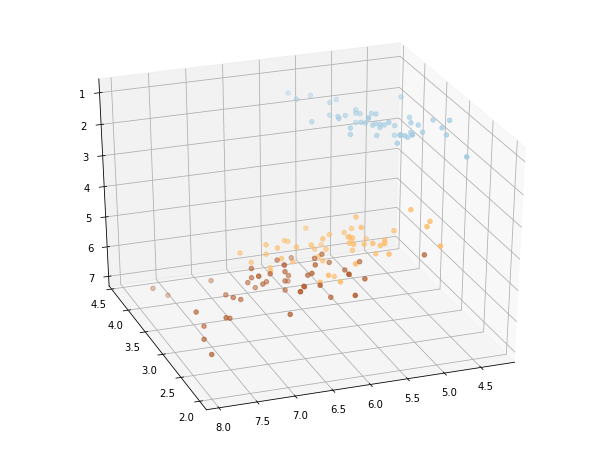

In [6]:

from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

ax.scatter( datairis[datairis.columns[0]],datairis[datairis.columns[1]], datairis[datairis.columns[2]], 
            c=data_classes,cmap=plt.cm.Paired)

plt.show()
